In [91]:
import glob
import re
import pandas as pd

In [92]:
def load_hogar_ccaa_data(
    path_pattern: str = '../../datamarts/picotaDataSuperCategories/hogar*.tsv',
    sort_by_ccaa: bool = True,
    ccaa_column_name: str = 'ccaa'
) -> pd.DataFrame:
    """
    Lee todos los ficheros TSV de hogares por CCAA, añade una columna con el código
    de CCAA extraído del nombre de fichero, concatena todo en un único DataFrame y
    opcionalmente ordena por CCAA.

    Parameters
    ----------
    path_pattern : str
        Patrón glob para localizar los archivos (por defecto '../../datamarts/picotaData/hogar*.tsv').
    sort_by_ccaa : bool
        Si True, ordena el DataFrame resultante por la columna de CCAA.
    ccaa_column_name : str
        Nombre de la columna donde se almacenará el código de CCAA.

    Returns
    -------
    pd.DataFrame
        DataFrame con todos los datos concatenados y la columna de CCAA.
    """
    files = glob.glob(path_pattern)
    dfs = []

    for fp in files:
        m = re.search(r'hogar(\d+)\.tsv$', fp)
        if not m:
            continue
        code = m.group(1).zfill(2)  # si quieres siempre dos dígitos, ojo

        df = pd.read_csv(fp, sep='\t')
        df[ccaa_column_name] = code
        dfs.append(df)

    if not dfs:
        raise FileNotFoundError(f"No se encontraron archivos con patrón {path_pattern}")

    big_df = pd.concat(dfs, ignore_index=True)

    if sort_by_ccaa:
        big_df.sort_values(ccaa_column_name, inplace=True)

    return big_df



In [93]:
df = load_hogar_ccaa_data()
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.head()

,timestamp,capitalProvincia,tamanoMunicipio,densidad,superficie,tipoCasa,aguaCaliente,calefaccion,zonaResidencial,regimenTenencia,comidasTotales,miembros:estudiantes,miembros:noEstudiantes,miembros:ocupados,miembros:noOcupados,miembros:activos,miembros:noActivos,miembros:ancianos:masculinos,miembros:ancianos:femeninos,miembros:adultos:masculinos,miembros:adultos:femeninos,miembros:ninos:femeninos,miembros:ninos:masculinos,miembros:conIngresos:masculinos,miembros:conIngresos:femeninos,miembros:sinIngresos:masculinos,miembros:sinIngresos:femeninos,edadSp,espanolSp,educacionSuperiorSp,fuentePrincipalIngresos,numeroViviendasAdicionales,ingresosNetos,gastoNoMonetario,tasaAhorro,temperaturaMedia,tasaParo,inflacion,España.tipoInteres,España.tasaCambioEurUsd,ipc,gastoMonetario:alimentosYBebidasNoAlcoholicas1,gastoMonetario:bebidasAlcoholicasYTabaco2,gastoMonetario:ropaYCalzado3,gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4,gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5,gastoMonetario:salud6,gastoMonetario:transportes7,gastoMonetario:comunicaciones8,gastoMonetario:ocioEspectaculosYCultura9,gastoMonetario:ensenanza10,gastoMonetario:hotelesCafesYRestaurantes11,gastoMonetario:otrosBienesYServicios12,ccaa
0,2006-01-01T00:00:00Z,False,1,1,80.0,1,True,False,3,4,84.0,0,3,0.0,3,1.0,2,1,1,0,0,1,0,1,1,0,1,67,True,False,pension,0.0,5478.930437,0.000000,0.148916,19.62,12.6,2.9,3.5,1.26,81.547750,997.845871,146.971731,216.484216,1019.858399,134.271362,85.680531,341.992468,307.857518,280.354501,0.000000,509.170645,622.534802,01
26322,2017-08-31T08:00:00Z,False,4,2,63.0,2,True,False,6,6,56.0,0,2,0.0,2,0.0,2,1,1,0,0,0,0,1,1,0,0,72,False,False,pension,0.0,9116.998932,5074.124848,-0.091342,19.62,25.5,1.1,0.0,1.13,95.182583,3293.921064,0.000000,0.190640,1700.995634,192.453094,171.180097,1645.154016,1699.585876,146.023933,0.000000,677.848871,422.598226,01
26323,2017-08-31T09:00:00Z,False,4,1,300.0,3,True,False,6,5,78.0,0,3,2.0,1,2.0,1,0,0,1,1,0,1,1,1,1,0,37,True,False,autonomYRenta,0.0,21688.327460,14216.693585,0.086921,19.62,25.5,1.1,0.0,1.13,95.182583,1408.238668,1650.657982,2203.257859,1628.532376,5215.607164,102.709746,1220.859015,992.739884,2326.776311,84.416657,431.799641,2537.590028,01
26324,2017-08-31T10:00:00Z,False,3,1,65.0,1,True,False,4,6,60.0,0,2,0.0,2,0.0,2,1,1,0,0,0,0,1,1,0,0,70,True,False,pension,0.0,15194.998221,3040.763952,0.183891,19.62,25.5,1.1,0.0,1.13,95.182583,3569.355732,0.000000,1376.278522,1446.901497,1712.315908,1416.790076,0.000000,461.117546,358.213641,0.000000,462.316263,1597.492371,01
26325,2017-09-01T11:00:00Z,True,5,3,94.0,2,True,False,5,4,24.0,0,1,1.0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,58,True,True,asalariado,0.0,12773.928504,0.000000,0.407326,19.62,25.5,1.1,0.0,1.13,95.182583,2320.428178,0.000000,0.000000,540.266603,241.127738,346.631676,405.199953,1114.299870,671.990355,422.083284,892.486662,616.241595,01


Convertimos en dummies las variables categoricas

In [94]:
df = pd.get_dummies(df, columns=['ccaa', 'fuentePrincipalIngresos'], prefix=['ccaa', 'fuentePrincipalIngresos'])

df.rename(columns=lambda x: re.sub(r'^ccaa_(\d+)$', r'ccaa_\1', x), inplace=True)
df.rename(columns=lambda x: re.sub(r'^fuentePrincipalIngresos_(\d+)$', r'fuentePrincipalIngresos_\1', x), inplace=True)


In [95]:
df['miembros:total'] = df['miembros:activos'] + df['miembros:noActivos']
df['miembros:ninos'] = df['miembros:ninos:masculinos'] + df['miembros:ninos:femeninos']
df["miembros:adultos"] = df['miembros:adultos:masculinos'] + df['miembros:adultos:femeninos']
df["miembros:ancianos"] = df['miembros:ancianos:masculinos'] + df['miembros:ancianos:femeninos']

In [96]:
df.head(
)

,timestamp,capitalProvincia,tamanoMunicipio,densidad,superficie,tipoCasa,aguaCaliente,calefaccion,zonaResidencial,regimenTenencia,comidasTotales,miembros:estudiantes,miembros:noEstudiantes,miembros:ocupados,miembros:noOcupados,miembros:activos,miembros:noActivos,miembros:ancianos:masculinos,miembros:ancianos:femeninos,miembros:adultos:masculinos,miembros:adultos:femeninos,miembros:ninos:femeninos,miembros:ninos:masculinos,miembros:conIngresos:masculinos,miembros:conIngresos:femeninos,miembros:sinIngresos:masculinos,miembros:sinIngresos:femeninos,edadSp,espanolSp,educacionSuperiorSp,numeroViviendasAdicionales,ingresosNetos,gastoNoMonetario,tasaAhorro,temperaturaMedia,tasaParo,inflacion,España.tipoInteres,España.tasaCambioEurUsd,ipc,gastoMonetario:alimentosYBebidasNoAlcoholicas1,gastoMonetario:bebidasAlcoholicasYTabaco2,gastoMonetario:ropaYCalzado3,gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4,gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5,gastoMonetario:salud6,gastoMonetario:transportes7,gastoMonetario:comunicaciones8,gastoMonetario:ocioEspectaculosYCultura9,gastoMonetario:ensenanza10,gastoMonetario:hotelesCafesYRestaurantes11,gastoMonetario:otrosBienesYServicios12,ccaa_01,ccaa_02,ccaa_03,ccaa_04,ccaa_05,ccaa_06,ccaa_07,ccaa_08,ccaa_09,ccaa_10,ccaa_11,ccaa_12,ccaa_13,ccaa_14,ccaa_15,ccaa_16,ccaa_17,ccaa_18,ccaa_19,fuentePrincipalIngresos_asalariado,fuentePrincipalIngresos_autonomYRenta,fuentePrincipalIngresos_pension,miembros:total,miembros:ninos,miembros:adultos,miembros:ancianos
0,2006-01-01T00:00:00Z,False,1,1,80.0,1,True,False,3,4,84.0,0,3,0.0,3,1.0,2,1,1,0,0,1,0,1,1,0,1,67,True,False,0.0,5478.930437,0.000000,0.148916,19.62,12.6,2.9,3.5,1.26,81.547750,997.845871,146.971731,216.484216,1019.858399,134.271362,85.680531,341.992468,307.857518,280.354501,0.000000,509.170645,622.534802,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,1,0,2
26322,2017-08-31T08:00:00Z,False,4,2,63.0,2,True,False,6,6,56.0,0,2,0.0,2,0.0,2,1,1,0,0,0,0,1,1,0,0,72,False,False,0.0,9116.998932,5074.124848,-0.091342,19.62,25.5,1.1,0.0,1.13,95.182583,3293.921064,0.000000,0.190640,1700.995634,192.453094,171.180097,1645.154016,1699.585876,146.023933,0.000000,677.848871,422.598226,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,0,0,2
26323,2017-08-31T09:00:00Z,False,4,1,300.0,3,True,False,6,5,78.0,0,3,2.0,1,2.0,1,0,0,1,1,0,1,1,1,1,0,37,True,False,0.0,21688.327460,14216.693585,0.086921,19.62,25.5,1.1,0.0,1.13,95.182583,1408.238668,1650.657982,2203.257859,1628.532376,5215.607164,102.709746,1220.859015,992.739884,2326.776311,84.416657,431.799641,2537.590028,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.0,1,2,0
26324,2017-08-31T10:00:00Z,False,3,1,65.0,1,True,False,4,6,60.0,0,2,0.0,2,0.0,2,1,1,0,0,0,0,1,1,0,0,70,True,False,0.0,15194.998221,3040.763952,0.183891,19.62,25.5,1.1,0.0,1.13,95.182583,3569.355732,0.000000,1376.278522,1446.901497,1712.315908,1416.790076,0.000000,461.117546,358.213641,0.000000,462.316263,1597.492371,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,0,0,2
26325,2017-09-01T11:00:00Z,True,5,3,94.0,2,True,False,5,4,24.0,0,1,1.0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,58,True,True,0.0,12773.928504,0.000000,0.407326,19.62,25.5,1.1,0.0,1.13,95.182583,2320.428178,0.000000,0.000000,540.266603,241.127738,346.631676,405.199953,1114.299870,671.990355,422.083284,892.486662,616.241595,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0,1,0


In [97]:
output_columns = [col for col in df.columns if col.startswith("gastoMonetario:")]


## Analísis de sensibilidad no lineal por código

### 🗂 Categorías por código (Super_Categoría)

| Código | Grupo de Gasto |
|--------|----------------|
| 1 | Alimentos y bebidas no alcohólicas |
| 2 | Bebidas alcohólicas, tabaco y narcóticos |
| 3 | Artículos de vestir y calzado |
| 4 | Vivienda, agua, electricidad, gas y otros combustibles |
| 5 | Mobiliario, equipamiento del hogar y gastos de conservación |
| 6 | Salud |
| 7 | Transportes |
| 8 | Comunicaciones |
| 9 | Ocio, espectáculos y cultura |
| 10 | Enseñanza |
| 11 | Hoteles, cafés y restaurantes |
| 12 | Otros bienes y servicios |



## GradientBoosting Regressor

In [101]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

def train_mlp_per_category(
    df,
    output_columns,
    # Hiperparámetros iniciales para MLP
    hidden_layer_sizes=(100, ),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42,
    top_n=10
):
    """
    Entrena un MLPRegressor para cada columna objetivo y calcula:
      - R2 y MSE
      - Importancias por permutación
    Devuelve:
      - r2_df: DataFrame ordenado por R2 descendente
      - mse_df: DataFrame ordenado por MSE ascendente
      - importances_df: concatenado de importancias
    """
    r2_records = []
    mse_records = []
    all_importances = []

    excluded = output_columns + ["timestamp"] if "timestamp" in df.columns else output_columns
    input_features = [c for c in df.select_dtypes(include="number").columns if c not in excluded]

    for target in output_columns:
        print(f"\n🔧 Training MLP for {target}...")

        df_clean = df.dropna(subset=[target] + input_features)
        if df_clean.shape[0] < len(input_features) + 10:
            print("❌ Not enough data. Skipping.")
            continue

        X = df_clean[input_features]
        y = df_clean[target]

        # Split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state
        )

        # Estandarización
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test  = scaler.transform(X_test)

        mlp = MLPRegressor(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            learning_rate_init=learning_rate_init,
            max_iter=max_iter,
            early_stopping=early_stopping,
            validation_fraction=validation_fraction,
            random_state=random_state
        )

        mlp.fit(X_train, y_train)

        # Predicciones y métricas
        y_pred = mlp.predict(X_test)
        r2  = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"✅ R²: {r2:.4f}, MSE: {mse:.4f}")

        # Importancia por permutación
        print("🔍 Calculating permutation importances...")
        result = permutation_importance(
            mlp, X_test, y_test,
            n_repeats=5,
            random_state=random_state,
            n_jobs=1
        )
        imp_df = pd.DataFrame({
            "Variable": input_features,
            "Importance": result.importances_mean,
            "Target": target
        }).sort_values("Importance", ascending=False)

        print(f"📊 Top {top_n} variables for {target}:")
        print(imp_df.head(top_n).to_string(index=False))

        r2_records.append({"Target": target, "R2": r2})
        mse_records.append({"Target": target, "MSE": mse})
        all_importances.append(imp_df)

    r2_df         = pd.DataFrame(r2_records).sort_values("R2", ascending=False)
    mse_df        = pd.DataFrame(mse_records).sort_values("MSE", ascending=True)
    importances_df = pd.concat(all_importances, ignore_index=True)

    return r2_df, importances_df, mse_df


In [104]:
r2_df, importances_df, mse_df = train_mlp_per_category(df, output_columns)



🔧 Training MLP for gastoMonetario:alimentosYBebidasNoAlcoholicas1...
✅ R²: 0.4696, MSE: 3744579.1372
🔍 Calculating permutation importances...
📊 Top 10 variables for gastoMonetario:alimentosYBebidasNoAlcoholicas1:
          Variable  Importance                                         Target
     ingresosNetos    0.488792 gastoMonetario:alimentosYBebidasNoAlcoholicas1
        tasaAhorro    0.374968 gastoMonetario:alimentosYBebidasNoAlcoholicas1
    comidasTotales    0.273707 gastoMonetario:alimentosYBebidasNoAlcoholicas1
               ipc    0.137741 gastoMonetario:alimentosYBebidasNoAlcoholicas1
            edadSp    0.028551 gastoMonetario:alimentosYBebidasNoAlcoholicas1
España.tipoInteres    0.025427 gastoMonetario:alimentosYBebidasNoAlcoholicas1
         inflacion    0.013936 gastoMonetario:alimentosYBebidasNoAlcoholicas1
  temperaturaMedia    0.011469 gastoMonetario:alimentosYBebidasNoAlcoholicas1
  miembros:activos    0.007347 gastoMonetario:alimentosYBebidasNoAlcoholicas1
  gast

In [105]:
importances_df.head(5)

,Variable,Importance,Target
0,ingresosNetos,0.488792,gastoMonetario:alimentosYBebidasNoAlcoholicas1
1,tasaAhorro,0.374968,gastoMonetario:alimentosYBebidasNoAlcoholicas1
2,comidasTotales,0.273707,gastoMonetario:alimentosYBebidasNoAlcoholicas1
3,ipc,0.137741,gastoMonetario:alimentosYBebidasNoAlcoholicas1
4,edadSp,0.028551,gastoMonetario:alimentosYBebidasNoAlcoholicas1


### Analísis del r2 de nuestros modelos

In [106]:
r2_df

,Target,R2
3,gastoMonetario:viviendaAguaElectricidadGasOtro...,0.506514
0,gastoMonetario:alimentosYBebidasNoAlcoholicas1,0.469571
10,gastoMonetario:hotelesCafesYRestaurantes11,0.460557
6,gastoMonetario:transportes7,0.426851
9,gastoMonetario:ensenanza10,0.344897
7,gastoMonetario:comunicaciones8,0.334495
8,gastoMonetario:ocioEspectaculosYCultura9,0.298841
2,gastoMonetario:ropaYCalzado3,0.271721
11,gastoMonetario:otrosBienesYServicios12,0.264076
4,gastoMonetario:mobiliarioEquipamientoDelHogarY...,0.258851


### Importancia de las variables por categoría de gasto

In [107]:
import matplotlib.pyplot as plt

def plot_feature_importances_by_target(df, top_n=15):
    """
    Genera una gráfica de barras horizontales por cada target en el DataFrame,
    mostrando las top_n variables más importantes.

    Parámetros:
    - df: DataFrame con columnas ['feature', 'importance', 'target']
    - top_n: número de variables más importantes a mostrar (por defecto 15)
    """
    targets = df['Target'].unique()
    for target in targets:
        subset = df[df['Target'] == target].sort_values(by='Importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(10, 6))
        plt.barh(subset['Variable'], subset['Importance'])
        plt.xlabel('Importancia')
        plt.title(f'Importancia de variables para: {target}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


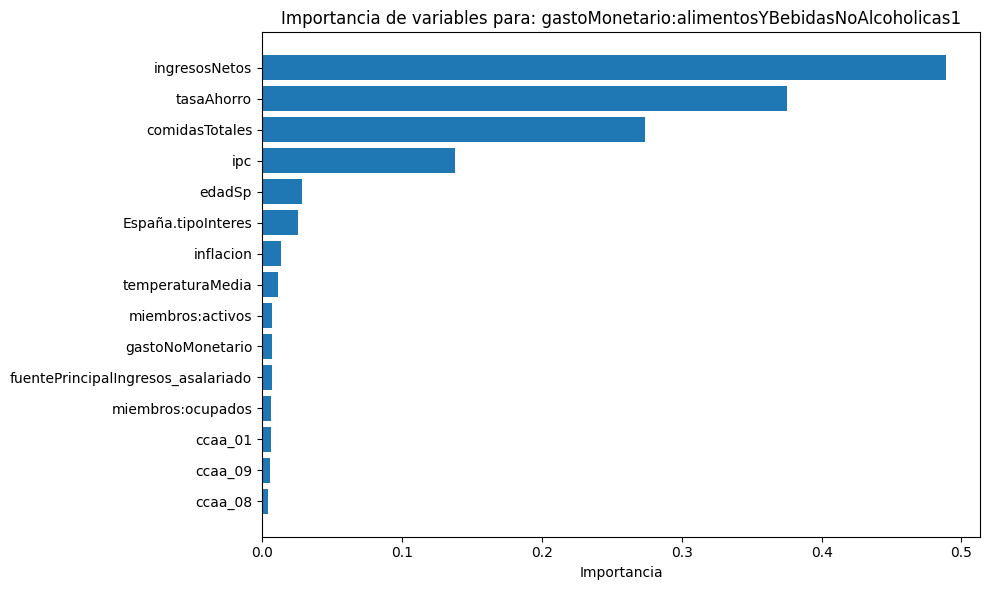

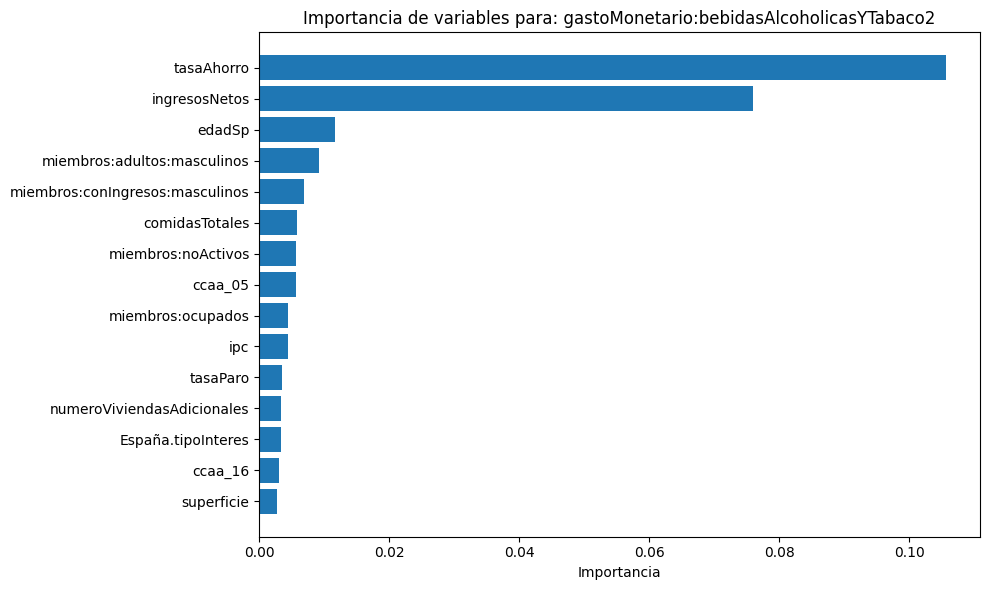

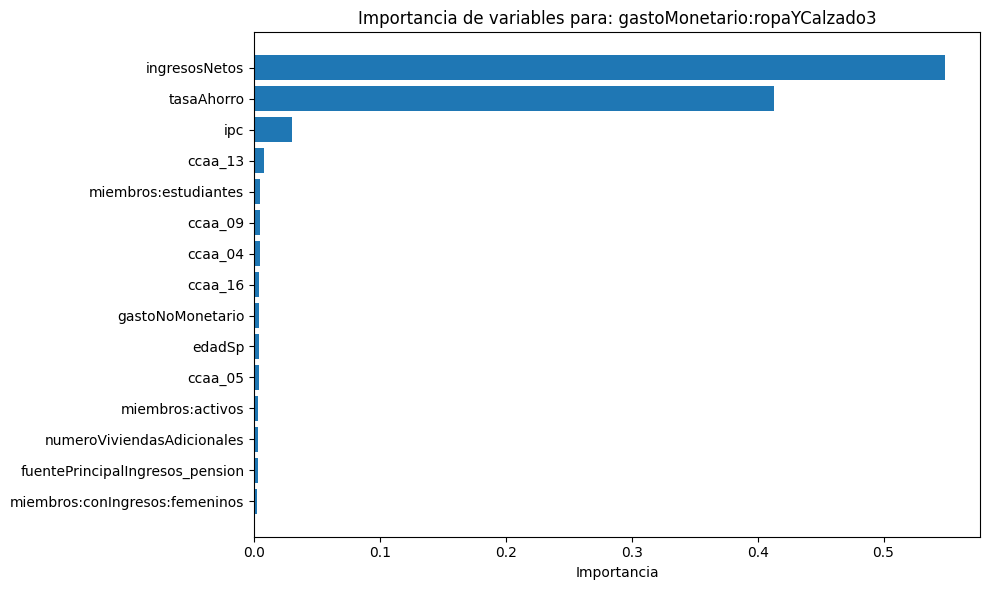

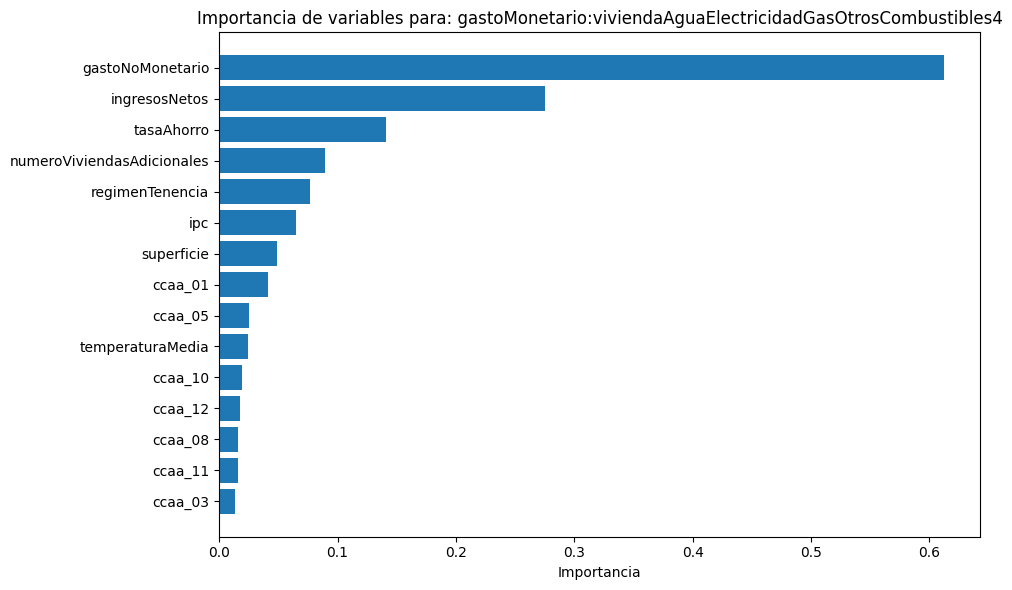

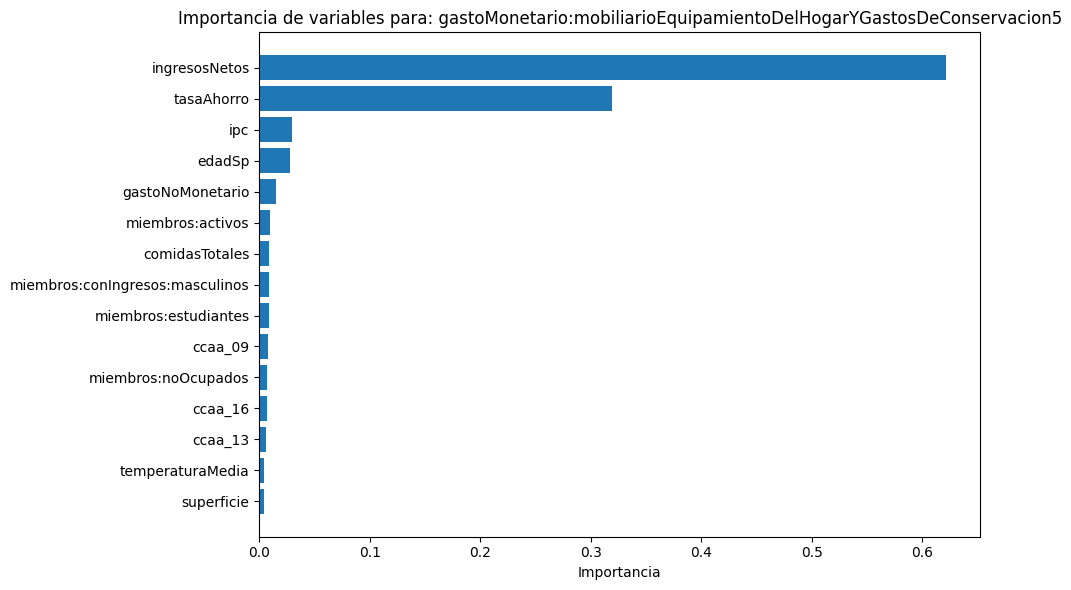

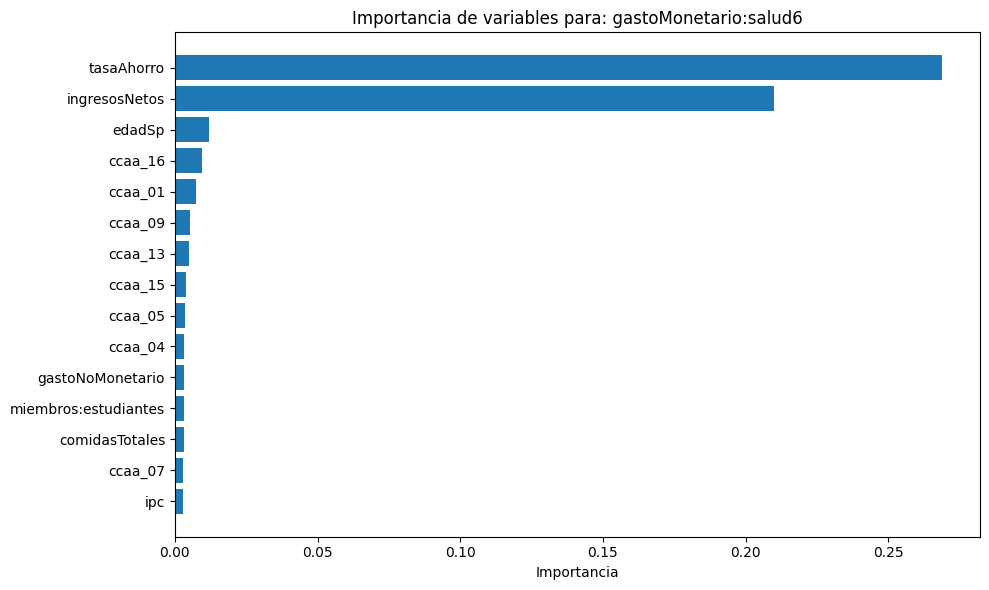

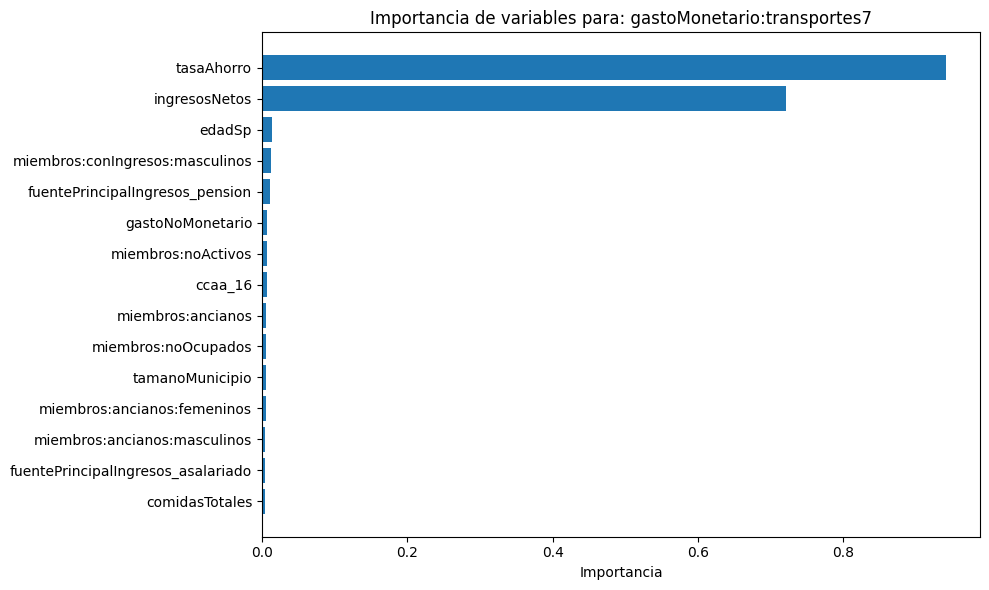

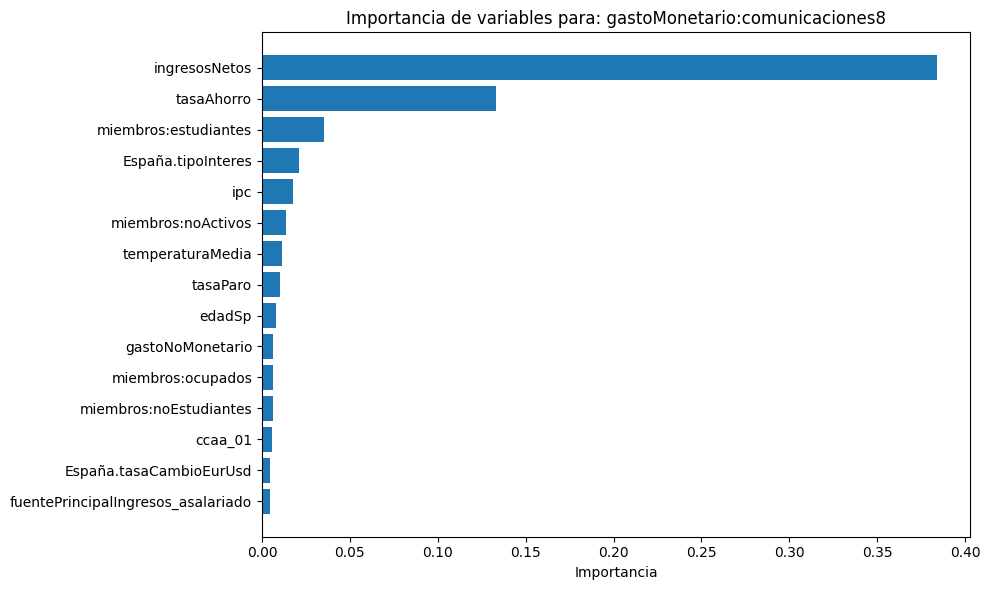

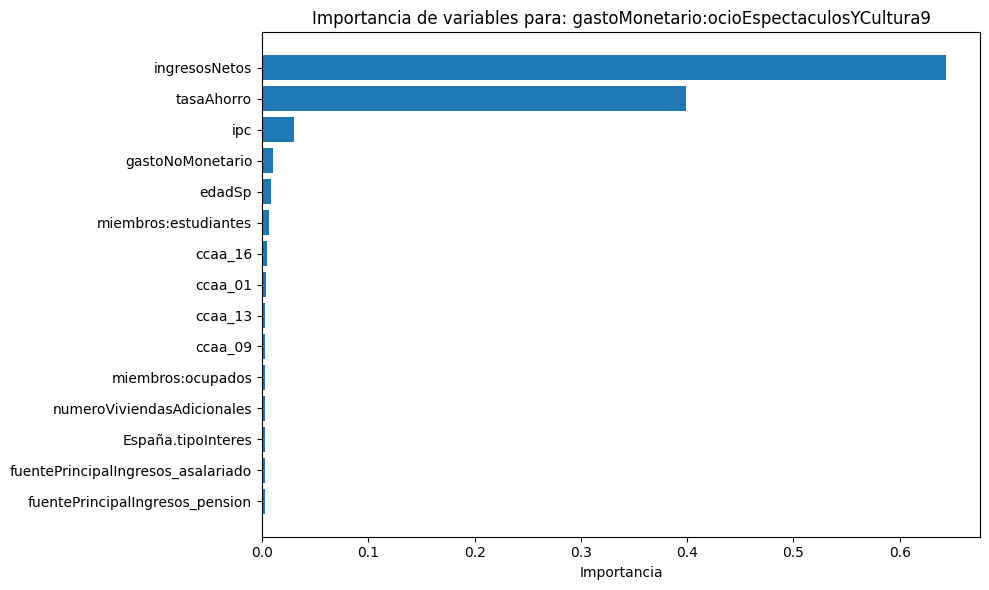

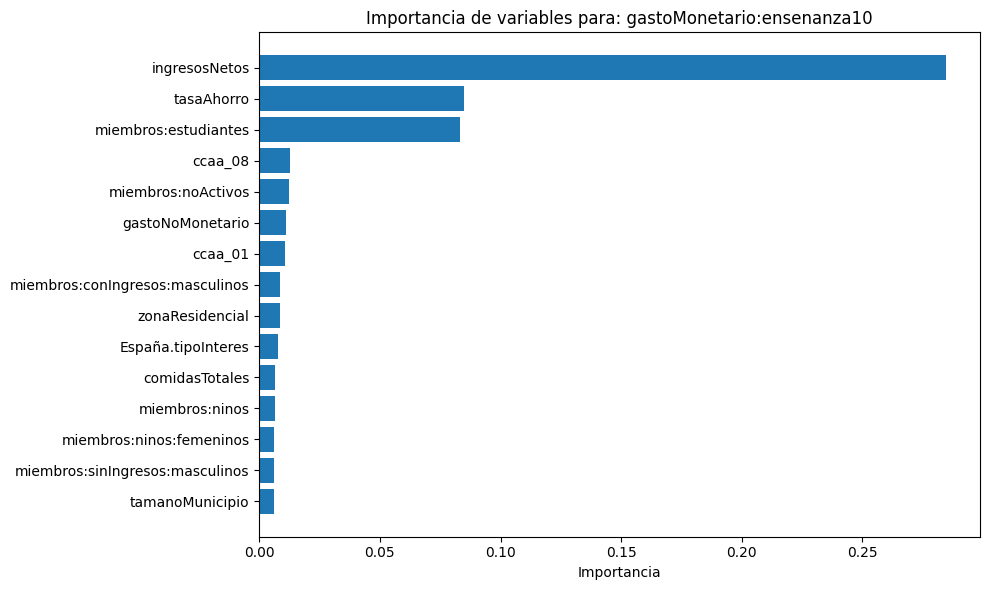

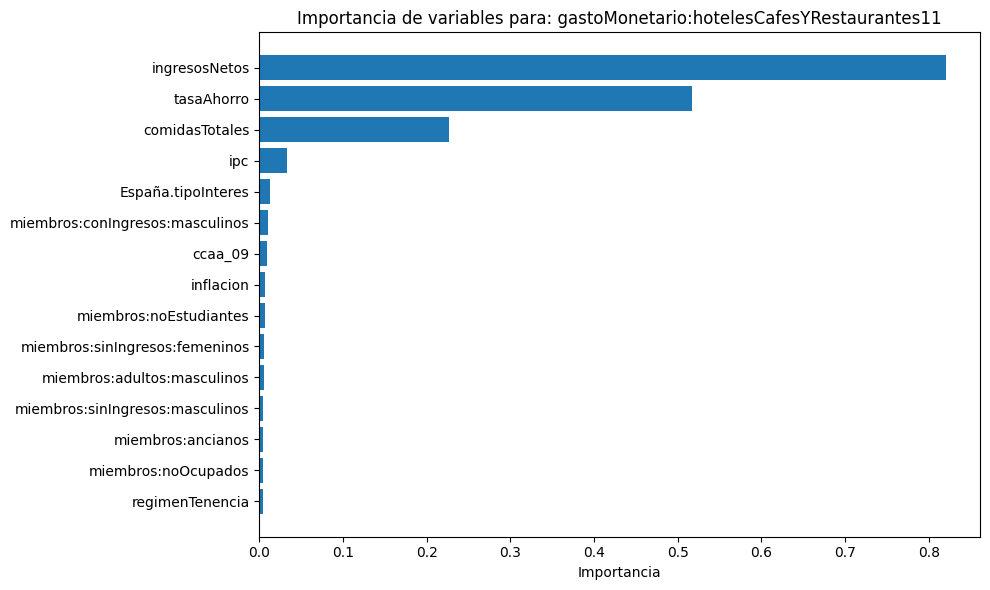

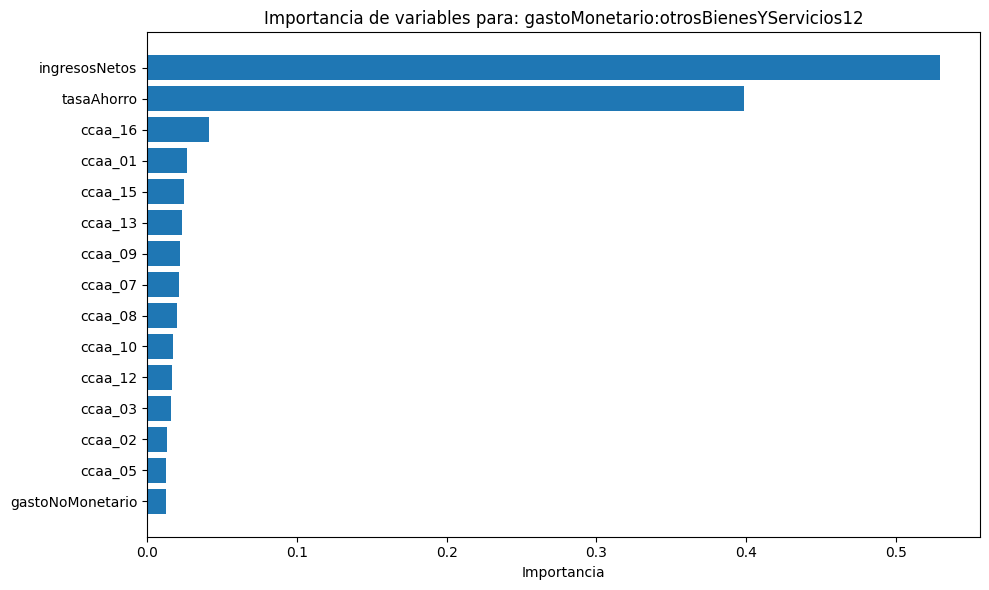

In [108]:
plot_feature_importances_by_target(importances_df)

In [109]:
# Save the coefficients DataFrame to a TSV file
importances_df.to_csv("../../datamarts/impotancia_por_categoria_no_lineal_supercategory.tsv", sep="\t", index=True)

In [110]:
# Save the r2 DataFrame to a CSV file
r2_df.to_csv("../../datamarts/r2_por_categoria_no_lineal_supercategory.tsv", sep="\t", index=False)

In [111]:
mse_df.to_csv("../../datamarts/mse_por_categoria_no_lineal_supercategory.tsv", sep="\t", index=False)

In [112]:
# ^Pivotear el DataFrame para que cada target tenga su propia columna de importancias
importances_pivoted = importances_df.pivot(index='Variable', columns='Target', values='Importance').reset_index()
importances_pivoted

Target,Variable,gastoMonetario:alimentosYBebidasNoAlcoholicas1,gastoMonetario:bebidasAlcoholicasYTabaco2,gastoMonetario:comunicaciones8,gastoMonetario:ensenanza10,gastoMonetario:hotelesCafesYRestaurantes11,gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5,gastoMonetario:ocioEspectaculosYCultura9,gastoMonetario:otrosBienesYServicios12,gastoMonetario:ropaYCalzado3,gastoMonetario:salud6,gastoMonetario:transportes7,gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4
0,España.tasaCambioEurUsd,0.001106,0.002174,0.004804,0.001657,0.001572,0.001177,0.000680,0.000553,0.000893,0.000240,0.000215,0.002163
1,España.tipoInteres,0.025427,0.003260,0.021263,0.007938,0.013272,0.001698,0.002565,0.003393,0.001543,0.001556,0.001310,0.010677
2,ccaa_01,0.006580,0.000533,0.005487,0.010783,0.001207,0.001408,0.003763,0.026447,0.001468,0.007442,0.001202,0.041537
3,ccaa_02,0.000843,0.000636,0.000631,0.002737,0.000569,0.001198,0.000387,0.013239,0.001474,0.002162,0.001467,0.003170
4,ccaa_03,0.000544,0.000250,0.001042,0.003164,0.000497,0.001064,0.000329,0.015589,0.000347,0.002356,0.000203,0.013074
5,ccaa_04,0.001303,0.000324,0.002738,0.001751,0.001834,0.002297,0.002159,0.006866,0.004299,0.003319,0.000607,0.002466
6,ccaa_05,0.004153,0.005569,0.003268,0.001471,0.002954,0.001571,0.001346,0.012484,0.003596,0.003631,0.000268,0.025155
7,ccaa_06,0.001015,0.000464,0.000789,0.004415,0.000876,0.000699,0.001133,0.010874,0.000086,0.002312,0.000069,0.003060
8,ccaa_07,0.001167,0.000719,0.001546,0.004758,0.000661,0.004136,0.000397,0.021470,0.001026,0.003004,0.000482,0.008930
9,ccaa_08,0.004573,0.000501,0.000654,0.012592,0.000981,0.001973,0.001348,0.019721,0.000418,0.001458,0.000450,0.015861


### Mapa de calor de los coeficientes por código

In [113]:
import seaborn as sns

In [114]:
import re

def renombrar_columnas_por_codigo(df, ignore_cols=None):
    """
    Renombra las columnas extrayendo el código numérico de su final
    (p. ej. de 'gastoMonetario:alojamiento112' deja '112', etc.),
    pero omite renombrar cualquier columna cuyo nombre esté en ignore_cols.
    
    Parámetros:
    - df: DataFrame de pandas.
    - ignore_cols: lista de nombres de columnas a excluir (por defecto ['variable']).
    """
    if ignore_cols is None:
        ignore_cols = ['Variable']
        
    patron = re.compile(r'(\d+)$')  

    mapping = {}
    
    for col in df.columns:
        if col in ignore_cols:
            continue
        m = patron.search(col)
        if m:
            mapping[col] = m.group(1)
    
    return df.rename(columns=mapping)


In [115]:
importances_pivoted

Target,Variable,gastoMonetario:alimentosYBebidasNoAlcoholicas1,gastoMonetario:bebidasAlcoholicasYTabaco2,gastoMonetario:comunicaciones8,gastoMonetario:ensenanza10,gastoMonetario:hotelesCafesYRestaurantes11,gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5,gastoMonetario:ocioEspectaculosYCultura9,gastoMonetario:otrosBienesYServicios12,gastoMonetario:ropaYCalzado3,gastoMonetario:salud6,gastoMonetario:transportes7,gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4
0,España.tasaCambioEurUsd,0.001106,0.002174,0.004804,0.001657,0.001572,0.001177,0.000680,0.000553,0.000893,0.000240,0.000215,0.002163
1,España.tipoInteres,0.025427,0.003260,0.021263,0.007938,0.013272,0.001698,0.002565,0.003393,0.001543,0.001556,0.001310,0.010677
2,ccaa_01,0.006580,0.000533,0.005487,0.010783,0.001207,0.001408,0.003763,0.026447,0.001468,0.007442,0.001202,0.041537
3,ccaa_02,0.000843,0.000636,0.000631,0.002737,0.000569,0.001198,0.000387,0.013239,0.001474,0.002162,0.001467,0.003170
4,ccaa_03,0.000544,0.000250,0.001042,0.003164,0.000497,0.001064,0.000329,0.015589,0.000347,0.002356,0.000203,0.013074
5,ccaa_04,0.001303,0.000324,0.002738,0.001751,0.001834,0.002297,0.002159,0.006866,0.004299,0.003319,0.000607,0.002466
6,ccaa_05,0.004153,0.005569,0.003268,0.001471,0.002954,0.001571,0.001346,0.012484,0.003596,0.003631,0.000268,0.025155
7,ccaa_06,0.001015,0.000464,0.000789,0.004415,0.000876,0.000699,0.001133,0.010874,0.000086,0.002312,0.000069,0.003060
8,ccaa_07,0.001167,0.000719,0.001546,0.004758,0.000661,0.004136,0.000397,0.021470,0.001026,0.003004,0.000482,0.008930
9,ccaa_08,0.004573,0.000501,0.000654,0.012592,0.000981,0.001973,0.001348,0.019721,0.000418,0.001458,0.000450,0.015861


In [116]:
def generar_mapa_calor_importancias(df, figsize=(22, 14), vmax=0.05, output_path=None):
    """
    Genera un mapa de calor con las columnas (códigos de gasto) ordenadas numéricamente.
    
    Args:
        df (pd.DataFrame): DataFrame con variables como filas y categorías como columnas.
        figsize (tuple): Tamaño de la figura.
        vmax (float): Valor máximo para la escala de color.
        output_path (str): Ruta opcional para guardar el mapa.
    """
    df_codificado = renombrar_columnas_por_codigo(df.copy())
    data = df_codificado.drop(columns=["Target", "Variable"], errors="ignore")
    data.index = df_codificado["Variable"] if "Variable" in df_codificado.columns else df_codificado.index

    # Reordenar columnas por valor numérico del código
    columnas_ordenadas = sorted(data.columns, key=lambda x: float(x.replace("_", ".")))
    data = data[columnas_ordenadas]

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        data,
        cmap="Reds",
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        linecolor="gray",
        vmin=0,
        vmax=vmax,
        cbar_kws={"label": "Importancia relativa"}
    )

    plt.title("Mapa de calor de importancias por variable y categoría de gasto", fontsize=14)
    plt.xlabel("Código de Categoría de Gasto")
    plt.ylabel("Variable")
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300)
    plt.show()

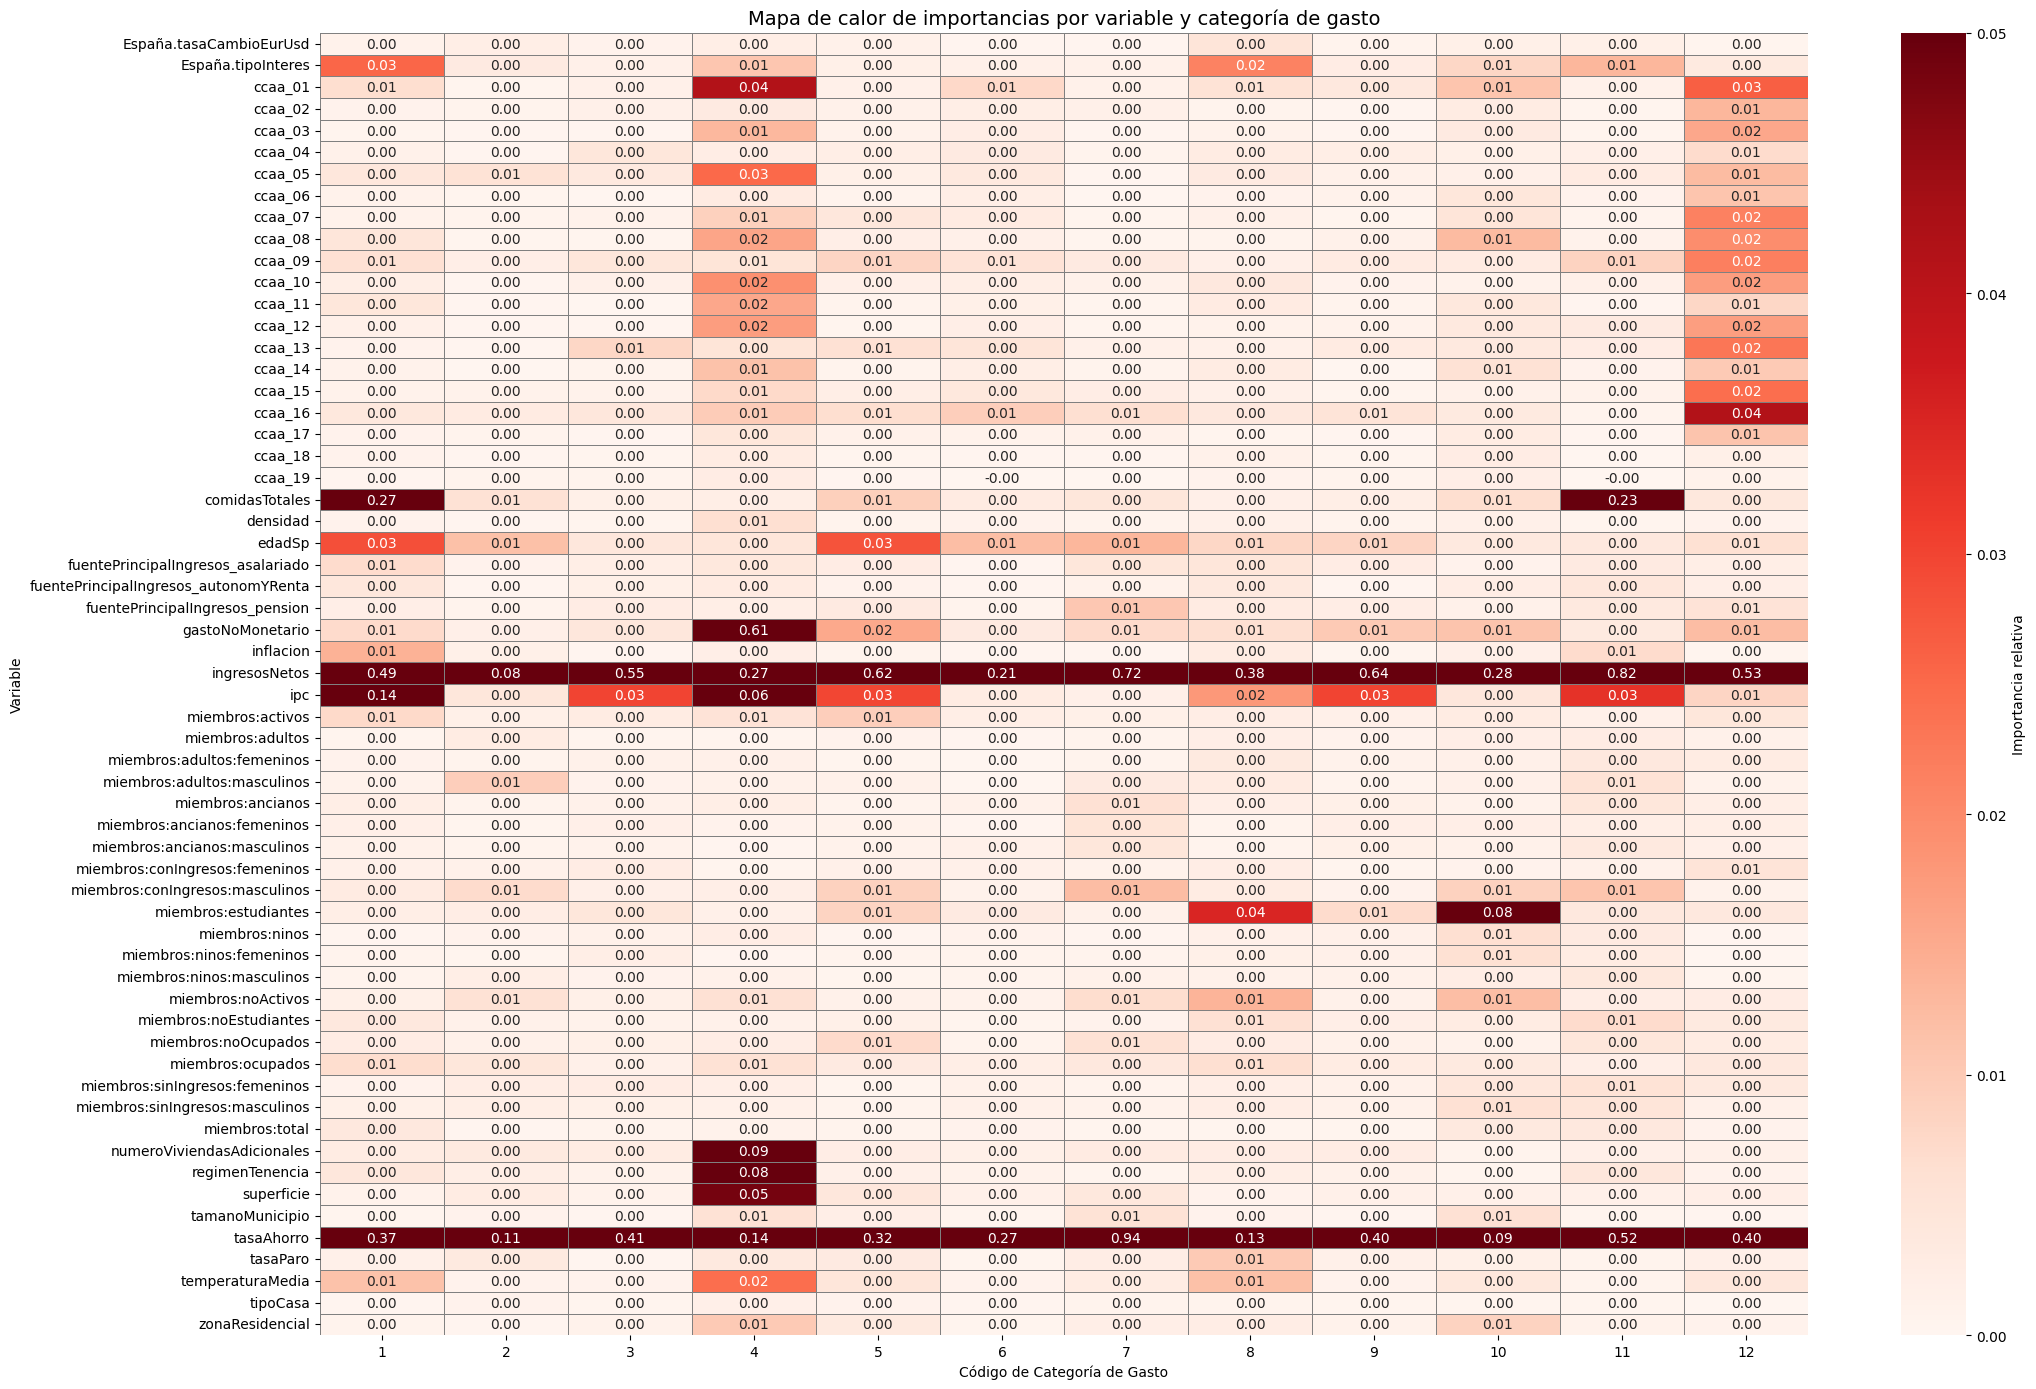

In [117]:
generar_mapa_calor_importancias(importances_pivoted)

### Analisis de sensibilidad no lineal (Busqueda de mejor modelo)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

In [ ]:
def train_models_per_category(
    df,
    output_columns,
    models=None,
    hidden_layer_sizes=(128, 64, 32),
    max_iter=500,
    top_n=10
):
    """
    Entrena múltiples modelos para cada variable objetivo y calcula métricas e importancias.

    Parámetros:
    - df: DataFrame con datos, incluye columnas de entrada numéricas y columnas de salida.
    - output_columns: lista de nombres de columnas objetivo.
    - models: diccionario opcional {'name': estimator_instance}. Si no se proporciona, usa MLP, Random Forest y Gradient Boosting.
    - hidden_layer_sizes, max_iter: parámetros para MLP si se incluye.
    - top_n: número de variables más importantes a mostrar.

    Retorna:
    - r2_df: DataFrame con R² para cada modelo y objetivo.
    - mse_df: DataFrame con MSE para cada modelo y objetivo.
    - importances_df: DataFrame concatenado de importancias de todas las combinaciones.
    - r2_pivot: DataFrame con R² de cada modelo en columnas por Target.
    """
    # Definir modelos por defecto
    if models is None:
        models = {
            'MLP': MLPRegressor(
                hidden_layer_sizes=hidden_layer_sizes,
                activation='relu',
                solver='adam',
                early_stopping=True,
                n_iter_no_change=10,
                validation_fraction=0.1,
                max_iter=max_iter,
                random_state=42
            ),
            'RandomForest': RandomForestRegressor(
                n_estimators=100,
                random_state=42
            ),
            'GradientBoosting': GradientBoostingRegressor(
                n_estimators=100,
                learning_rate=0.1,
                random_state=42
            )
        }

    # Preparar características de entrada
    excluded = output_columns + ['timestamp'] if 'timestamp' in df.columns else output_columns
    input_features = [c for c in df.select_dtypes(include='number').columns if c not in excluded]

    # Listas para almacenar resultados
    r2_records = []
    mse_records = []
    all_importances = []

    for name, model in models.items():
        for target in output_columns:
            print(f"\n🔧 Entrenando {name} para objetivo {target}...")

            df_clean = df.dropna(subset=[target] + input_features)
            if df_clean.shape[0] < len(input_features) + 10:
                print("❌ No hay datos suficientes. Se omite.")
                continue

            X = df_clean[input_features]
            y = df_clean[target]

            # Separar datos
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )

            # Normalizar (solo para MLP)
            if name == 'MLP':
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

            # Entrenar modelo
            model.fit(X_train, y_train)

            # Predecir y evaluar
            y_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            print(f"✅ {name} - R²: {r2:.4f}, MSE: {mse:.4f}")

            # Importancia por permutación
            # print("🔍 Calculando importancias por permutación...")
            # result = permutation_importance(
            #     model,
            #     X_test,
            #     y_test,
            #     n_repeats=5,
            #     random_state=42,
            #     n_jobs=1
            # )
            # imp_df = pd.DataFrame({
            #     'Model': name,
            #     'Target': target,
            #     'Variable': input_features,
            #     'Importance': result.importances_mean
            # }).sort_values(by='Importance', ascending=False)

            # print(f"📊 Top {top_n} variables para {name} en {target}:")
            # print(imp_df.head(top_n).to_string(index=False))

            # Guardar resultados
            r2_records.append({'Model': name, 'Target': target, 'R2': r2})
            mse_records.append({'Model': name, 'Target': target, 'MSE': mse})
            # all_importances.append(imp_df)

    # Crear DataFrames de resultados
    r2_df = pd.DataFrame(r2_records)
    mse_df = pd.DataFrame(mse_records)
    # importances_df = pd.concat(all_importances, ignore_index=True)

    # Pivot para ver R² de cada modelo en la misma fila por Target
    r2_df = r2_df.pivot(index='Target', columns='Model', values='R2').reset_index()

    return r2_df, mse_df #, importances_df



In [ ]:
output_columns = [col for col in df.columns if col.startswith("gastoMonetario:")]

r2_df, mse_df = train_models_per_category(df, output_columns)



🔧 Entrenando MLP para objetivo gastoMonetario:alimentosYBebidasNoAlcoholicas1...
✅ MLP - R²: 0.4719, MSE: 3728048.2619

🔧 Entrenando MLP para objetivo gastoMonetario:bebidasAlcoholicasYTabaco2...
✅ MLP - R²: 0.1109, MSE: 578378.6098

🔧 Entrenando MLP para objetivo gastoMonetario:ropaYCalzado3...
✅ MLP - R²: 0.2762, MSE: 3078363.1852

🔧 Entrenando MLP para objetivo gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4...
✅ MLP - R²: 0.5153, MSE: 2505013.2748

🔧 Entrenando MLP para objetivo gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5...
✅ MLP - R²: 0.2739, MSE: 2995771.5318

🔧 Entrenando MLP para objetivo gastoMonetario:salud6...
✅ MLP - R²: 0.1368, MSE: 4310339.2226

🔧 Entrenando MLP para objetivo gastoMonetario:transportes7...
✅ MLP - R²: 0.4720, MSE: 14387627.0129

🔧 Entrenando MLP para objetivo gastoMonetario:comunicaciones8...
✅ MLP - R²: 0.3333, MSE: 201995.2208

🔧 Entrenando MLP para objetivo gastoMonetario:ocioEspectaculosYCultura9...
✅ MLP - R²: 0

In [ ]:
r2_df

Model,Target,GradientBoosting,MLP,RandomForest
0,gastoMonetario:alimentosYBebidasNoAlcoholicas1,0.452194,0.471913,0.457893
1,gastoMonetario:bebidasAlcoholicasYTabaco2,0.102991,0.110881,0.087901
2,gastoMonetario:comunicaciones8,0.323394,0.333321,0.317342
3,gastoMonetario:ensenanza10,0.309130,0.316749,0.330764
4,gastoMonetario:hotelesCafesYRestaurantes11,0.460249,0.467121,0.462174
5,gastoMonetario:mobiliarioEquipamientoDelHogarY...,0.251256,0.273903,0.250878
6,gastoMonetario:ocioEspectaculosYCultura9,0.310670,0.312299,0.288575
7,gastoMonetario:otrosBienesYServicios12,0.285331,0.332317,0.270498
8,gastoMonetario:ropaYCalzado3,0.278929,0.276183,0.250273
9,gastoMonetario:salud6,0.136290,0.136761,0.089595


In [ ]:
# ordena r2_df por R² descendente
r2_df = r2_df.sort_values(by=list(r2_df.columns[1:]), ascending=False)

In [ ]:
r2_df

Model,Target,GradientBoosting,MLP,RandomForest
11,gastoMonetario:viviendaAguaElectricidadGasOtro...,0.487558,0.515269,0.494611
10,gastoMonetario:transportes7,0.462402,0.471987,0.468251
4,gastoMonetario:hotelesCafesYRestaurantes11,0.460249,0.467121,0.462174
0,gastoMonetario:alimentosYBebidasNoAlcoholicas1,0.452194,0.471913,0.457893
2,gastoMonetario:comunicaciones8,0.323394,0.333321,0.317342
6,gastoMonetario:ocioEspectaculosYCultura9,0.310670,0.312299,0.288575
3,gastoMonetario:ensenanza10,0.309130,0.316749,0.330764
7,gastoMonetario:otrosBienesYServicios12,0.285331,0.332317,0.270498
8,gastoMonetario:ropaYCalzado3,0.278929,0.276183,0.250273
5,gastoMonetario:mobiliarioEquipamientoDelHogarY...,0.251256,0.273903,0.250878


In [ ]:

# quiero ver cuantas veces aparece cada modelo como el mejor
best_model_counts = r2_df.iloc[:, 1:].idxmax(axis=1).value_counts()
best_model_counts = best_model_counts.reset_index()
best_model_counts.columns = ['Model', 'Count']

best_model_counts = best_model_counts.sort_values(by='Count', ascending=False)
best_model_counts


,Model,Count
0,MLP,10
1,RandomForest,1
2,GradientBoosting,1


In [ ]:
mse_df

,Model,Target,MSE
0,MLP,gastoMonetario:alimentosYBebidasNoAlcoholicas1,3.728048e+06
1,MLP,gastoMonetario:bebidasAlcoholicasYTabaco2,5.783786e+05
2,MLP,gastoMonetario:ropaYCalzado3,3.078363e+06
3,MLP,gastoMonetario:viviendaAguaElectricidadGasOtro...,2.505013e+06
4,MLP,gastoMonetario:mobiliarioEquipamientoDelHogarY...,2.995772e+06
5,MLP,gastoMonetario:salud6,4.310339e+06
6,MLP,gastoMonetario:transportes7,1.438763e+07
7,MLP,gastoMonetario:comunicaciones8,2.019952e+05
8,MLP,gastoMonetario:ocioEspectaculosYCultura9,3.941187e+06
9,MLP,gastoMonetario:ensenanza10,9.061242e+05


In [ ]:
# 1) Pivot para tener columnas por modelo
mse_pivot = mse_df.pivot(index='Target', columns='Model', values='MSE').reset_index()

# 2) Para cada Target, identificar qué modelo tiene el MSE más alto
mse_pivot['Worst_Model'] = mse_pivot[['MLP','RandomForest','GradientBoosting']].idxmax(axis=1)

In [ ]:
worst_counts = mse_pivot['Worst_Model'].value_counts().rename_axis('Model').reset_index(name='Count')
worst_counts

,Model,Count
0,RandomForest,7
1,GradientBoosting,5


In [ ]:
average_mse = mse_pivot[['MLP','RandomForest','GradientBoosting']].mean().reset_index()
average_mse.columns = ['Model','Average_MSE']
average_mse


,Model,Average_MSE
0,MLP,3.859895e+06
1,RandomForest,3.970539e+06
2,GradientBoosting,3.945173e+06
